In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import PIL
from scipy import stats
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
heads = np.load("heads.npy")

In [3]:
#Rotate heads
for i, img in enumerate(heads):
    if i % 100 == 0:
        print(".", end = "")
    try:
        slope = stats.linregress(np.where(heads[i,:,:,0]!=0))[0]
        slope = -np.rad2deg(slope)
        img = np.array(Image.fromarray(np.array(img, dtype=np.uint8)).rotate(slope, PIL.Image.BICUBIC))
        horizontal_center = np.argmax(np.mean(img[:,:,0],0))
        shift = horizontal_center-32
        img = np.pad(img, [(0,0),(64,64),(0,0)],"constant")
        img = img[:,64+shift:2*64+shift,:]
        heads[i,:,:,:] = img
    except:
        pass

.......................................................................................................................................................................................................................................................................................................................................................................................................

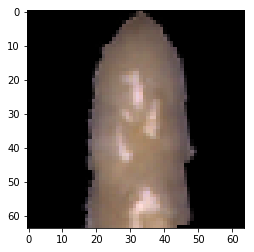

In [4]:
plt.imshow(np.array(heads[200],dtype=np.uint8))

In [5]:
def hstack(images):
    images1 = np.ndarray([images.shape[0]//3,images.shape[1],images.shape[2]*images.shape[3],images.shape[3]])
    for idx in range(len(images1)):
        if (idx % 100) == 0:
            print(".",end = "")
        images1[idx,:,:,:] = np.hstack([np.hstack([images[idx*3],images[(idx*3)+1]]),images[(idx*3)+2]])
    return images1

In [6]:
heads = hstack(heads)

...................................................................................................................................

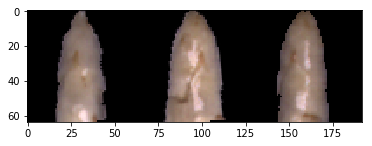

In [7]:
plt.imshow(np.array(heads[300],dtype=np.uint8))

In [8]:
input_shape = list(heads.shape[1:])

In [9]:
labels = pd.read_csv("labels.csv",header=0)

In [10]:
labels.keys()

Index(['id', 'is_hollow', 'has_blume', 'has_rost_head', 'has_rost_body',
       'is_bended', 'is_violet', 'short', 'thick', 'thin'],
      dtype='object')

In [11]:
labels = labels[["has_blume","has_rost_head"]]
images = heads

In [12]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [13]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [14]:
sample_img = x_train[0]
sample_targets = np.array(y_train)[0]

In [15]:
print(sample_img.shape)
print(sample_targets.shape)

(64, 192, 3)
(2,)


In [16]:
batch_size = 10
epochs = 40
num_classes = sample_targets.shape[0]
# input image dimensions
img_rows, img_cols = list(sample_img.shape)[0:2]

In [17]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),activation='relu',input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

x_train shape: (10422, 64, 192, 3)
10422 train samples
2606 test samples


In [33]:
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 10422 samples, validate on 2606 samples
Epoch 1/20
10422/10422 [==============================] - 509s 49ms/step - loss: 0.1856 - accuracy: 0.9385 - val_loss: 0.4288 - val_accuracy: 0.8722
Epoch 2/20
10422/10422 [==============================] - 516s 50ms/step - loss: 0.1794 - accuracy: 0.9408 - val_loss: 0.4550 - val_accuracy: 0.8636
Epoch 3/20
10422/10422 [==============================] - 704s 68ms/step - loss: 0.1673 - accuracy: 0.9454 - val_loss: 0.4520 - val_accuracy: 0.8768
Epoch 4/20
10422/10422 [==============================] - 694s 67ms/step - loss: 0.1641 - accuracy: 0.9464 - val_loss: 0.4510 - val_accuracy: 0.8686
Epoch 5/20
10422/10422 [==============================] - 858s 82ms/step - loss: 0.1560 - accuracy: 0.9484 - val_loss: 0.4841 - val_accuracy: 0.8741
Epoch 6/20
10422/10422 [==============================] - 849s 81ms/step - loss: 0.1503 - accuracy: 0.9510 - val_loss: 0.5227 - val_accuracy: 0.8716
Epoch 7/20
10422/10422 [==============================] -

/home/elerator/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (2.107996). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


   20/10422 [..............................] - ETA: 21:59 - loss: 0.0374 - accuracy: 1.0000

/home/elerator/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (1.054678). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


10422/10422 [==============================] - 228s 22ms/step - loss: 0.1282 - accuracy: 0.9616 - val_loss: 0.8963 - val_accuracy: 0.8759
Test loss: 0.896335159586378
Test accuracy: 0.8758633732795715


In [46]:
ll.extend(bb)

Text(0, 0.5, 'Loss')

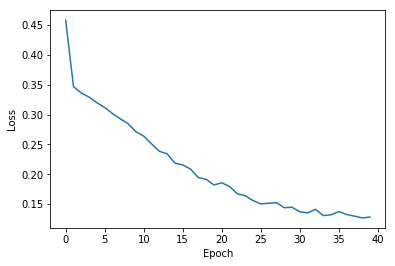

In [49]:
plt.plot(history.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [50]:
y_pred = model.predict(x_test)

In [51]:
def get_confusion_matrices(y_pred,y_test,bias=False, additional_measures=False):
    #Calculate confusion matrix
    if bias == False:
        bias = .5
    y_pred = y_pred > bias
    y_test = pd.DataFrame(y_test, dtype=np.int32)
    y_pred = np.array(y_pred, dtype=np.int32)
    y_test = pd.DataFrame(y_test)
    false_negatives = np.sum(np.logical_and(y_test == 1,y_pred==0),axis=0)#y_test is 1 while y_pred did not indicate
    false_positives = np.sum(np.logical_and(y_test == 0,y_pred==1),axis=0)#y_test is 0 while y_pred say it was 1
    true_positives = np.sum(np.logical_and(y_test == 1,y_pred==1),axis=0)#both indicate 1
    true_negatives = np.sum(np.logical_and(y_test == 0,y_pred==0),axis=0)#both indicate 0
    summary = pd.DataFrame()
    summary['False positive'] = false_positives
    summary['False negative'] = false_negatives
    summary['True positive'] = true_positives
    summary['True negative'] = true_negatives
    summary = pd.DataFrame(summary)
    #print(summary.sum(axis=1)[0])
    summary_percent = (summary/summary.sum(axis=1)[0])
    if additional_measures:
        #summary_percent['Accuracy'] = summary_percent['True positive'] + summary_percent['True negative']
        summary_percent['Sensitivity'] = summary_percent['True positive']/(summary_percent['True positive']+summary_percent['False negative'])
        summary_percent['Specificity'] = summary_percent['True negative']/(summary_percent['True negative']+summary_percent['False positive'])

    return summary, summary_percent

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def roc_characteristic(y_pred,y_test):
    fpr = []
    tpr = []
    biases = []
    for bias in np.linspace(-50,50,1000):
        print(".",end="")
        summary, _ = get_confusion_matrices(y_pred,y_test,bias=np.abs(sigmoid(bias)))
        fpv = summary["False positive"]/(summary["False positive"]+summary["True negative"])
        tpv = summary["True positive"]/(summary["True positive"]+summary["False negative"])
        biases.append(bias)
        fpr.append(fpv)
        tpr.append(tpv)
    return np.array([np.array(fpr), np.array(tpr)])

In [55]:
confusion = get_confusion_matrices(y_pred, y_test, .5, True)[1]

In [56]:
#confusion["Accuracy"]= confusion[["True positive","True negative"]].sum(axis=1)

In [57]:
confusion.round(2)

,False positive,False negative,True positive,True negative,Sensitivity,Specificity
has_blume,0.04,0.06,0.08,0.82,0.55,0.95
has_rost_head,0.02,0.13,0.03,0.83,0.19,0.98


In [59]:
confusion.round(2).to_latex()

'\\begin{tabular}{lrrrrrr}\n\\toprule\n{} &  False positive &  False negative &  True positive &  True negative &  Sensitivity &  Specificity \\\\\n\\midrule\nhas\\_blume     &            0.04 &            0.06 &           0.08 &           0.82 &         0.55 &         0.95 \\\\\nhas\\_rost\\_head &            0.02 &            0.13 &           0.03 &           0.83 &         0.19 &         0.98 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [60]:
roc = roc_characteristic(y_pred, y_test)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Text(0.5, 1.0, 'Receiver operating characteristic (ROC)')

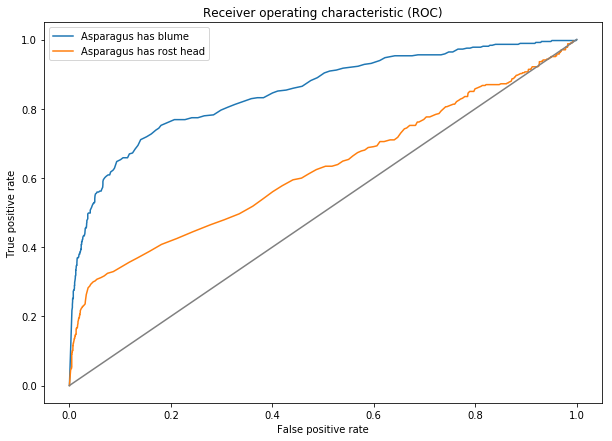

In [61]:
fig, ax = plt.subplots(1,figsize=(10,7))
ax.plot(roc[0][:,0],roc[1][:,0], label="Asparagus has blume")
ax.plot(roc[0][:,1],roc[1][:,1], label="Asparagus head affected by rust")

ax.plot([0,1],color = "gray")
ax.legend()


ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Receiver operating characteristic (ROC)')